<a href="https://colab.research.google.com/github/wwalbrecht/stuff4students/blob/main/C++09-Klassen-Teil2.ipynb"
 target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# C++09–Klassen 2: Konstruktoren, Destruktoren ...

# Nötige Initialisierungen

## Init für C++

Für C++ müssen Installationen gemacht (und ausgeführt) werden, damit im Notebook das "cell magic" %%cuda für den Compiler verfügbar ist. (Quelle: https://www.geeksforgeeks.org/how-to-run-cuda-c-c-on-jupyter-notebook-in-google-colaboratory/)

Falls sie dieses Notebook in Colab geöffnet haben, dann führen sie jetzt diesen Code-Block aus! Zum Ausführen des Programm-Code gehen sie mit der Maus über die nächste Zelle (Code Block) und klicken auf den Pfeil (Dreieck) daneben.

(Für Interessierte: Mit '!' am Anfang der Zeil werden hier Befehle an die Konsole des Servers geschickt.)

In [ ]:
!echo "Installation according to https://github.com/andreinechaev/nvcc4jupyter"
!echo "*** 1.)  Test if NVIDIA(R)-cuda-compiler-driver is availabe..."
!nvcc --version
!echo "*** 2.) Install extension to run nvcc ..."
%pip install nvcc4jupyter
!echo "*** 3.) Load extension using a 'line magic %' command...."
%load_ext nvcc4jupyter

Weitere Infos (allerdings nicht ganz neu): https://colab.research.google.com/github/j143/notebooks/blob/main/cuda_on_colab.ipynb

#### Hello C++-World from Jupyter Notebook

<img src="pics/ISO_C++_Logo.svg" alt="C++" width="30" height="auto">
Falls die Installationen geklappt haben, dann sollten sie jetzt auch folgendes ausführen können.

In [ ]:
%%cuda
#include <iostream>
int	main(void) {
	std::cout << "Hello from C++ inside jupyter notebook!\n";
	return 0;
}

Probleme? 
> Sehen sie statt der Ausgabe nur "*UsageError: Cell magic `%%cuda` not found.*"?
> Haben sie den Code-Block darüber schon ausgeführt?
> (Wundern sie sich nicht über die Unterstrich-Markierungen des Editors -- der denkt leider er hätte Python-Code vor sich.)

## Init für plantUML-Diagramme

Ein Tool zum Zeichnen von (UML-)Diagrammen zur Illustration im Notebook. [(Dokumentation dazu)](https://plantuml.com/de/)

In [ ]:
%pip install iplantuml
import iplantuml

Ein kleine Diagramm nur zum Testen...

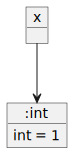

In [14]:
%%plantuml

@startuml
object x 
object ":int" as int_1 {
    int = 1
}
x --> int_1
@enduml

*Damit sollten die Initialisierungen erledigt sein und der Hauptteil kann starten.*

# Konstruktoren: Einführung



## Konstruktoren: Einführung: Motivation

(K)ein Probleme beim Initialisieren?

**Frage:** Was könnten beim folgenden Code schief gehen, bzw. ungewollt sein?

In [ ]:
%%cuda
#include <iostream>
using namespace std;

class Student{
public:
    string name;
    int matnr;
    void init(void){
        this->name= "unbekannt";
        this->matnr= 12345;
    }
}; //Student

int main(void){
    Student localStud111;
    cout << localStud111.matnr << endl;
    cout << "...wie erwartet?" << endl;
}

*Alte Zeiten*: Bei der Verwendung von (fremden und eigenen) Daten und Funktionen:
Es muss oft zuerst eine init-Funktion aufgerufen werden.
Das wurde aber immer wieder vergessen.

*Neu, objektorientiert*: Keine Gefahr mehr bei Klassen dank Konstruktoren! Sie müssen nur angelegt/definieren werden.

Sie werden dann immer automatisch Aufgerufen …genau zum richtigen Zeitpunkt! Dazu gleich mehr, zunächst: Wie sehen diese etwas merkwürdigen Funktionen aus?


## Konstruktoren: Einführung: Definition

Ein Konstruktor ist eine spezielle Member-Funktion
- deren Name identisch mit dem Namen der Klasse ist;
- sie geben niemals einen Return-Wert zurück; 
- ...auch kein Return-Typ bei der Definition angeben, noch nicht einmal void!
- Wie bei "normalen" Funktionen, kann man es auch bei Konstruktoren mehrere Varianten mit unterschiedlichen Parameterlisten definieren (→**Überladen**)

Hier ein Beispiel:

In [ ]:
%%cuda
#include <iostream>
#include <string>
using namespace std;

class Student{
private:
    string name;
    int matnr;
public:
    // Ein Konstruktor (immer ohne Return-Typ!):
    Student(void){
        this->name= "N.N.";
        this->matnr= 0;
    }

    // Ein weiterer Konstruktor:
    Student(string name_in, int matnr_in){
        this->name= name_in;
        this->matnr = matnr_in;
    }

    void print(void){
        cout << this->name << ", " << this->matnr << endl;
    }
}; //Student

int main(void){
    Student s1;
    Student s2("Uwe", 12345);
    s1.print();
    s2.print();
}



### Konstruktoren: Einführung: Aufrufzeitpunkte:

...immer automatisch zum richtigen Zeitpunkt: 

**Beobachten Sie selbst**:

In [ ]:
%%cuda
#include <iostream>
using namespace std;

class Student{
public:
    Student(void){
        cout << "Hello!" << endl;
    }
}; //Student

Student globStud1;

int main(void){
    cout << "\n ---- Start-of-main-------" << endl;    
    Student localStud1;

    Student *sP;
    sP= new Student;
    delete sP;
    cout << "\n ---- End-of-main-------" << endl;
}

<details> <summary>Aufrufzeitpunkte Lösung</summary>
</br>
- globale Objekte → vor main() </br>
- funktionslokale Objekte → immer wieder beim Betreten (Ausnahme: static)</br>
- dynamisch erzeugte Objekte → beim Aufruf von new </br>
</details>


### Konstruktoren: Einführung: Default-Konstruktur:

*Kleines Problem:* 

Sobald **ein** Konstruktor **mit Parametern** von ihnen definiert wurde, müssen sie selbst auch einen Konstruktor **ohne Paramter** (void) definieren -- falls sie ihn benötigen.

**Beobachen** sie, folgender Code liefert einen Fehler.

In [ ]:
%%cuda
#include <iostream>
using namespace std;

class Student{
private:
    string name;
public:
    Student(string name_in){
        this->name= name_in;
    }
}; //Student


int main(void){
    Student localStud1;
    cout << "...ein Problem?" << endl;
}

**3 Lösungen**

1. Sie definieren einen zusätzlichen Konstruktor ohne Parameter;
2. Sie fügen folgenden Code in die Klasse hinzu: `Student() = default;` -- *Probieren sie es oben!*
3. Sie nutzen Standard-(Default-)-Parameterwerte -- *wie sie gleich sehen werden* 

### Konstruktoren: Einführung: Standard-Parameterwerte:

TODO...